In [5]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy==0.6.0

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:14 http://ppa.lau

In [6]:
import openpyxl
import konlpy
from konlpy.tag import  Okt
from konlpy.utils import pprint
import pandas as pd
import numpy as np
import regex as re
from collections import Counter
from itertools import chain
from konlpy.tag import Twitter
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize
import networkx
import math
import ast
from wordcloud import WordCloud
from nltk import FreqDist
import matplotlib.pyplot as plt
from PIL import Image
from functools import reduce
import pyLDAvis
import pyLDAvis.sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.model_selection import GridSearchCV
from pprint import pprint
from glob import glob
import seaborn as sns
import warnings
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from PIL import Image
from sklearn.preprocessing import MinMaxScaler
import folium
from folium import plugins
import matplotlib as mpl
import matplotlib.font_manager as fm
import json
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.optimizers import Adam
import shap
from statistics import mean
from math import pi

/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable
/usr/local/lib/python3.8/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Mapping
/usr/local/lib/python3.8/dist-packages/tensorflow/python/framework/dtypes.py:513: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.object,
/usr/local/lib/python3.8/dist-packages/tensorflow/python/framework/dtype

In [3]:
#한글 폰트

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 7 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (22.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


In [7]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [4]:
! pip install openpyxl==3.0.9
! pip install pyLDAvis==3.3.1
! pip install wordcloud
! pip install pandas==1.3.5
! pip install numpy==1.21.5
! pip install shap
! pip install tensorflow==2.3.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 242 kB 4.7 MB/s 
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 3.0.10
    Uninstalling openpyxl-3.0.10:
      Successfully uninstalled openpyxl-3.0.10


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 4.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=d08b609db6f0fcdf438740419a6880936fe9eb87589cc879188b3dd6123b729d
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=d579eca727b4dd889accdb85c9c4d5c08c986e040a0c79bc8d22a4571ac75a1c
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built pyLDAvis sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in i

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 4.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320.5 MB 1.3 kB/s 
     |████████████████████████████████| 20.6 MB 1.2 MB/s 
     |████████████████████████████████| 26.0 MB 75.0 MB/s 
     |████████████████████████████████| 459 kB 79.7 MB/s 
     |████████████████████████████████| 2.9 MB 46.7 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling sc

In [8]:
warnings.filterwarnings('ignore')

# 2022년 3분기 재무 데이터 불러오기

In [9]:
JM = pd.read_csv("/content/drive/MyDrive/DScover/2022_3분기보고서_01_재무상태표_20221201.txt", delimiter = '\t',
                     encoding = "cp949")
LP1 = pd.read_csv("/content/drive/MyDrive/DScover/2022_3분기보고서_02_손익계산서_20221201.txt", delimiter = '\t',
                     encoding = "cp949")
LP2 = pd.read_csv("/content/drive/MyDrive/DScover/2022_3분기보고서_03_포괄손익계산서_20221201.txt", delimiter = '\t',
                     encoding = "cp949")

In [10]:
MF = pd.read_csv("/content/drive/MyDrive/DScover/2022_3분기보고서_04_현금흐름표_20221201.txt", delimiter = '\t',
                     encoding = "cp949")

In [11]:
LP_concat = pd.concat([LP1, LP2], axis = 0)

In [12]:
# 각 데이터마다 칼럼값 맞춰주기
from folium.elements import JSCSSMixin
JM = JM.rename(columns = {"당기 3분기말" : "당기3분기"}).drop(["Unnamed: 15", "전기말", "전전기말"], axis = 1)

MF = MF.rename(columns = {"당기 3분기" : "당기3분기",
                                       "전기 3분기" : "전기3분기"})

LP1 = LP1.rename(columns = {"당기 3분기 누적" : "당기3분기",
                                           "전기 3분기 누적" : "전기3분기"}).drop(["당기 3분기 3개월", "전기 3분기 3개월"], axis = 1)

LP2 = LP2.rename(columns = {"당기 3분기 누적" : "당기3분기",
                                           "전기 3분기 누적" : "전기3분기"}).drop(["당기 3분기 3개월", "전기 3분기 3개월"], axis = 1)

In [13]:
Fin_data = pd.concat([JM,MF,LP1,LP2]).drop(["재무제표종류", "결산월", "결산기준일", "보고서종류", "통화"], axis = 1)
Fin_data = Fin_data.reset_index(drop = True)

In [14]:
name_clean = []

In [15]:
for i in Fin_data["항목명"] :
    i = i.replace(" ", "")
    name_clean.append(i)
Fin_data["항목명"] = name_clean

In [16]:
# 2021년의 재무 데이터 불러오기
JM_2021 = pd.read_csv("/content/drive/MyDrive/DScover/2021_3분기보고서_01_재무상태표_20221110.txt", delimiter = '\t',
                     encoding = "cp949")

In [17]:
JM_2021 = JM_2021.rename(columns = {"당기 3분기말" : "2021년3분기_재무상태"}).drop(["Unnamed: 15", "전기말", "전전기말"],
                                                                                  axis = 1)

In [18]:
name_clean = []

In [19]:
for i in JM_2021["항목명"] :
  i = i.replace(" ", "")
  name_clean.append(i)
JM_2021["항목명"] = name_clean

In [20]:
Fin_data = pd.merge(left=Fin_data, right=JM_2021[["회사명", "항목명", "2021년3분기_재무상태"]], how='left', 
                  on=['회사명','항목명'], sort=False)

Fin_data = Fin_data.rename(columns = {"2021년3분기_재무상태" : "전기3분기_재무상태",
                                     "전기3분기" : "전기3분기_손익계산+현금흐름"})
Fin_data = Fin_data.drop_duplicates()
Fin_data

종목코드     회사명        시장구분   업종              업종명  \
0       [095570]  AJ네트웍스  유가증권시장상장법인  763  산업용 기계 및 장비 임대업   
1       [095570]  AJ네트웍스  유가증권시장상장법인  763  산업용 기계 및 장비 임대업   
2       [095570]  AJ네트웍스  유가증권시장상장법인  763  산업용 기계 및 장비 임대업   
3       [095570]  AJ네트웍스  유가증권시장상장법인  763  산업용 기계 및 장비 임대업   
4       [095570]  AJ네트웍스  유가증권시장상장법인  763  산업용 기계 및 장비 임대업   
...          ...     ...         ...  ...              ...   
240337  [238490]      힘스   코스닥시장상장법인  292    특수 목적용 기계 제조업   
240338  [238490]      힘스   코스닥시장상장법인  292    특수 목적용 기계 제조업   
240339  [238490]      힘스   코스닥시장상장법인  292    특수 목적용 기계 제조업   
240340  [238490]      힘스   코스닥시장상장법인  292    특수 목적용 기계 제조업   
240341  [238490]      힘스   코스닥시장상장법인  292    특수 목적용 기계 제조업   

                                         항목코드             항목명  \
0                    ifrs-full_AssetsAbstract    자산[abstract]   
1                     ifrs-full_CurrentAssets            유동자산   
2            ifrs-full_CashAndCashEquivalents        현금및현금성자산   
3               dart_ShortTermTradeReceivable            매출채권   
4                       ifrs-full_Inventories            재고자산   
...                                       ...             ...   
240337     ifrs-full_OtherComprehensiveIncome          기타포괄손익   
240338          ifrs-full_ComprehensiveIncome           총포괄손익   
240339     ifrs-full_EarningsPerShareAbstract  주당이익[abstract]   
240340    ifrs-full_BasicEarningsLossPerShare      기본주당이익(손실)   
240341  ifrs-full_DilutedEarningsLossPerShare      희석주당이익(손실)   

                  당기3분기 전기3분기_손익계산+현금흐름  전기  전전기       전기3분기_재무상태  
0                   NaN             NaN NaN  NaN              NaN  
1       218,541,779,271             NaN NaN  NaN  124,696,034,513  
2        46,720,939,335             NaN NaN  NaN   14,861,538,166  
3        81,098,652,314             NaN NaN  NaN   61,925,133,723  
4        29,440,069,529             NaN NaN  NaN   18,485,358,547  
...                 ...             ...  ..  ...              ...  
240337        2,161,898      15,459,679 NaN  NaN              NaN  
240338   -6,748,167,208   4,720,389,391 NaN  NaN              NaN  
240339              NaN             NaN NaN  NaN              NaN  
240340             -609             421 NaN  NaN              NaN  
240341             -609             421 NaN  NaN              NaN  

[240115 rows x 12 columns]

In [21]:
Fin_data = Fin_data.drop(["전기", "전전기"], axis = 1)

In [22]:
Fin_data.head()

종목코드     회사명        시장구분   업종              업종명  \
0  [095570]  AJ네트웍스  유가증권시장상장법인  763  산업용 기계 및 장비 임대업   
1  [095570]  AJ네트웍스  유가증권시장상장법인  763  산업용 기계 및 장비 임대업   
2  [095570]  AJ네트웍스  유가증권시장상장법인  763  산업용 기계 및 장비 임대업   
3  [095570]  AJ네트웍스  유가증권시장상장법인  763  산업용 기계 및 장비 임대업   
4  [095570]  AJ네트웍스  유가증권시장상장법인  763  산업용 기계 및 장비 임대업   

                               항목코드           항목명            당기3분기  \
0          ifrs-full_AssetsAbstract  자산[abstract]              NaN   
1           ifrs-full_CurrentAssets          유동자산  218,541,779,271   
2  ifrs-full_CashAndCashEquivalents      현금및현금성자산   46,720,939,335   
3     dart_ShortTermTradeReceivable          매출채권   81,098,652,314   
4             ifrs-full_Inventories          재고자산   29,440,069,529   

  전기3분기_손익계산+현금흐름       전기3분기_재무상태  
0             NaN              NaN  
1             NaN  124,696,034,513  
2             NaN   14,861,538,166  
3             NaN   61,925,133,723  
4             NaN   18,485,358,547

In [23]:
# 자본총계를 의미하는 서로 다른 용어들을 통일
List = ["당분기말","분기말자본" ,"기말" ,"분기말",
        "반기말자본" , "기말자본",
        "IV.기말자본", "분기말잔액","당반기말",
        "당기말" ,"당기말자본", "3분기말자본"]

In [24]:
for change in List :
    # List에 들어간 용어들 "자본총계"로 치환
    Fin_data["항목명"] = Fin_data["항목명"].replace(change, "자본총계")

# 항목명이 "자기주식의취득"이면서 항목코드가 "ifrs-full_Equity"인 경우는 잘못 기입된 경우로 판단하여, 데이터에서 삭제
idx = Fin_data[(Fin_data["항목명"] == "자기주식의취득") & (Fin_data["항목코드"] == "ifrs-full_Equity")].index
Fin_data = Fin_data.drop(index = idx, axis = 0)

In [25]:
# 유동자산을 의미하는 서로 다른 용어들을 통일
List = ["Ⅰ.유동자산", "I.유동자산", "l.유동자산"]

for change in List :
    # List에 들어간 용어들 유동자산으로 치환
    Fin_data["항목명"] = Fin_data["항목명"].replace(change, "유동자산")

In [26]:
# 유동부채를 의미하는 서로 다른 용어들을 통일
List = ["Ⅰ.유동부채", "I.유동부채", "l.유동부채"]

for change in List :
    # List에 들어간 용어들 유동부채로 치환
    Fin_data["항목명"] = Fin_data["항목명"].replace(change, "유동부채")

# 고정자산(=비유동자산)을 의미하는 서로 다른 용어들을 통일
List = ["비유동자산", "Ⅱ.비유동자산", "ll.비유동자산", "II.비유동자산"]

for change in List :
    # List에 들어간 용어들 고정자산으로 치환
    Fin_data["항목명"] = Fin_data["항목명"].replace(change, "고정자산")

In [27]:
# 부채비율 계산
total_liability = Fin_data[Fin_data["항목명"] == "부채총계"][["회사명", "당기3분기"]].rename(columns = {"당기3분기" : "부채총계"})
total_capital = Fin_data[Fin_data["항목명"] == "자본총계"][["회사명", "당기3분기"]].rename(columns = {"당기3분기" : "자본총계"})

# 부채총계, 자본총계를 회사명을 기준으로 결합한 뒤 계산
liability_proportion = pd.merge(total_liability, total_capital,
        left_on = "회사명", right_on = "회사명", how = "inner")
liability_proportion["부채총계"] = liability_proportion["부채총계"].str.replace(",", "").astype(float)
liability_proportion["자본총계"] = liability_proportion["자본총계"].str.replace(",", "").astype(float)
liability_proportion["부채비율"] = liability_proportion["부채총계"]*100/liability_proportion["자본총계"]
liability_proportion.head()

회사명          부채총계          자본총계        부채비율
0  AJ네트웍스  9.427981e+11  4.137454e+11  227.869129
1   AK홀딩스  3.367761e+11  5.549637e+11   60.684352
2  APS홀딩스  8.925770e+10  1.867372e+11   47.798561
3   AP시스템  2.947013e+11  2.666286e+11  110.528779
4    AP위성  1.860790e+10  8.367961e+10   22.237079

In [28]:
# 유동비율 계산
current_asset = Fin_data[Fin_data["항목명"] == "유동자산"][["회사명", "당기3분기"]].rename(columns = {"당기3분기" : "유동자산"})
current_liability = Fin_data[Fin_data["항목명"] == "유동부채"][["회사명", "당기3분기"]].rename(columns = {"당기3분기" : "유동부채"})

# 유동자산, 유동부채를 회사명을 기준으로 결합한 뒤 계산
current_proportion = pd.merge(current_asset, current_liability,
        left_on = "회사명", right_on = "회사명", how = "inner")
current_proportion["유동자산"] = current_proportion["유동자산"].str.replace(",", "").astype(float)
current_proportion["유동부채"] = current_proportion["유동부채"].str.replace(",", "").astype(float)
current_proportion["유동비율"] = current_proportion["유동자산"]*100/current_proportion["유동부채"]
current_proportion.head()

회사명          유동자산          유동부채        유동비율
0  AJ네트웍스  2.185418e+11  6.549571e+11   33.367340
1   AK홀딩스  1.285970e+11  3.252766e+11   39.534665
2  APS홀딩스  5.205321e+10  6.458789e+10   80.592831
3   AP시스템  4.049160e+11  2.469068e+11  163.995442
4    AP위성  9.154222e+10  1.863413e+10  491.260999

In [29]:
# 고정비율 계산
fixed_asset = Fin_data[Fin_data["항목명"] == "고정자산"][["회사명", "당기3분기"]].rename(columns = {"당기3분기" : "고정자산"})

# 고정자산, 자본총계를 회사명을 기준으로 결합한 뒤 계산
fixed_proportion = pd.merge(fixed_asset, total_capital ,
        left_on = "회사명", right_on = "회사명", how = "inner")
fixed_proportion["고정자산"] = fixed_proportion["고정자산"].str.replace(",", "").astype(float)
fixed_proportion["자본총계"] = fixed_proportion["자본총계"].str.replace(",", "").astype(float)
fixed_proportion["고정비율"] = fixed_proportion["고정자산"]*100/fixed_proportion["자본총계"]
fixed_proportion.head()

회사명          고정자산          자본총계        고정비율
0  AJ네트웍스  1.138002e+12  4.137454e+11  275.048778
1   AK홀딩스  7.631428e+11  5.549637e+11  137.512206
2  APS홀딩스  2.239417e+11  1.867372e+11  119.923447
3   AP시스템  1.564140e+11  2.666286e+11   58.663613
4    AP위성  1.074530e+10  8.367961e+10   12.840996

In [30]:
# 매출액을 의미하는 서로 다른 용어들을 통일
List = ['I.매출', 'I.매출액','I.영업수익','Ⅰ.매출','Ⅰ.매출액',
 'Ⅰ.영업수익','고객과의계약에서생기는수익','매출','매출(영업수익)',
 '매출및지분법손익','매출액','매출액(매출액)','매출액(영업수익)',
 '매출액(주석23)','매출액.','매출액및지분법손익','수익','수익(매출과지분법손익)',
 '수익(매출액)','수익(순매출액)', '영업수익(매출)']

for change in List :
    # List에 들어간 용어들 매출액으로 치환
    Fin_data["항목명"] = Fin_data["항목명"].replace(change, "매출액")

# 항목코드가 "ifrs-full_GrossProfit"이거나 "dart_OperatingIncomeLoss"인 영업수익을 제외한 나머지 영업수익을 "매출액"으로 용어 치환
index = Fin_data[(Fin_data["항목명"] == "영업수익") & 
                 (Fin_data["항목코드"] != "ifrs-full_GrossProfit") & 
                                                (Fin_data["항목코드"] != "dart_OperatingIncomeLoss")]["항목명"].index
Fin_data.loc[index,"항목명"] = "매출액"


# 항목코드가 "ifrs-full_GrossProfit"인 영업수익(매출액)을 제외한 나머지 영업수익(매출액)을 "매출액"으로 용어 치환
index = Fin_data[(Fin_data["항목명"] == "영업수익(매출액)") & (Fin_data["항목코드"] != "ifrs-full_GrossProfit")]["항목명"].index
Fin_data.loc[index,"항목명"] = "매출액"

In [31]:
# 영업이익을 의미하는 서로 다른 용어들을 통일
List = ['영업이익(손실)', '영업손익', 'V.영업손익',
        '영업손실', 'Ⅳ.영업이익(손실)', 'Ⅳ.영업이익','Ⅲ.영업이익',
        'V.영업이익(손실)', 'Ⅴ.영업이익', 'III.영업이익', 'IV.영업이익', 
        'III.영업이익(손실)','IV.영업이익(손실)', 'Ⅴ.영업손실', 'Ⅴ.영업이익(손실)',
        '정상영업손익']

for change in List :
    # List에 들어간 용어들 영업이익으로 치환
    Fin_data["항목명"] = Fin_data["항목명"].replace(change, "영업이익")

# 항목코드가 "dart_OperatingIncomeLoss"이지만 항목명이 "영업수익"인 경우, 잘못 기입된 데이터로 판단하여 제거
index = Fin_data[(Fin_data["항목명"] == "영업수익") & (Fin_data["항목코드"] == "dart_OperatingIncomeLoss")]["항목명"].index
Fin_data = Fin_data.drop(index = index, axis= 0 )

In [32]:
# 법인세비용차감전순이익을 의미하는 서로 다른 용어들을 통일
# '법인세비용차감전순이익', '법인세차감전순이익'를 제외한, 항목코드가 "ifrs-full_ProfitLossBeforeTax"인 항목명들 리스트로 입력
List = Fin_data[Fin_data["항목코드"] == "ifrs-full_ProfitLossBeforeTax"]["항목명"].unique().tolist()
List = np.delete(List,[List.index('법인세비용차감전순이익'),List.index('법인세차감전순이익')])

for change in List :
    # List에 들어간 용어들 법인세비용차감전순이익으로 치환
    Fin_data["항목명"] = Fin_data["항목명"].replace(change, "세전순이익")

# 항목명이 "법인세비용차감전순이익"  이거나 "법인세차감전순이익"이고 항목코드가 "ifrs-full_ProfitLossBeforeTax"인 경우, "세전순이익"으로 용어 치환
index = Fin_data[((Fin_data["항목명"] == "법인세비용차감전순이익") | (Fin_data["항목명"] == "법인세차감전순이익")) & 
                 (Fin_data["항목코드"] == "ifrs-full_ProfitLossBeforeTax")]["항목명"].index
Fin_data.loc[index,"항목명"] = "세전순이익"

Fin_data[Fin_data["항목명"] == "세전순이익"].shape

(2226, 10)

In [33]:


# 매출액영업이익률 계산
operating_income = Fin_data[Fin_data["항목명"] == "영업이익"][["회사명", "당기3분기"]].rename(columns = {"당기3분기" : "영업이익"})
sales_revenue = Fin_data[Fin_data["항목명"] == "매출액"][["회사명", "당기3분기"]].rename(columns = {"당기3분기" : "매출액"})

# 매출액이 두 가지로 나오는 "나노신소재" 의 경우는 잘못 기입된 경우로 판단하여 해당 기업을 데이터에서 삭제
sales_revenue[sales_revenue["회사명"] == "나노신소재"]
index = sales_revenue[sales_revenue["회사명"] == "나노신소재"].index
sales_revenue = sales_revenue.drop(index = index, axis = 0)

# 영업이익, 매출액을 회사명을 기준으로 결합한 뒤 계산
sales_operating_profit_margin = pd.merge(operating_income, sales_revenue,
        left_on = "회사명", right_on = "회사명", how = "inner")
sales_operating_profit_margin["영업이익"] = sales_operating_profit_margin["영업이익"].str.replace(",", "").astype(float)
sales_operating_profit_margin["매출액"] = sales_operating_profit_margin["매출액"].str.replace(",", "").astype(float)
sales_operating_profit_margin["매출액영업이익률"] = sales_operating_profit_margin["영업이익"]*100/sales_operating_profit_margin["매출액"]
sales_operating_profit_margin.head()

회사명          영업이익           매출액   매출액영업이익률
0      CJ  1.065407e+11  1.792986e+11  59.420826
1  CJ대한통운  1.885711e+11  6.111732e+12   3.085396
2   DB하이텍  6.149762e+11  1.278147e+12  48.114674
3      DL  1.870903e+11  2.084261e+11  89.763363
4    DL건설  5.096709e+10  1.266332e+12   4.024780

In [34]:
# 매출액세전순이익률 계산
income_beforetax = Fin_data[Fin_data["항목명"] == "세전순이익"][["회사명", "당기3분기"]].rename(columns = {"당기3분기" : "세전순이익"})

# 세전순이익, 매출액을 회사명을 기준으로 결합한 뒤 계산
net_income_beforetax = pd.merge(income_beforetax, sales_revenue,
        left_on = "회사명", right_on = "회사명", how = "inner")
net_income_beforetax["세전순이익"] = net_income_beforetax["세전순이익"].str.replace(",", "").astype(float)
net_income_beforetax["매출액"] = net_income_beforetax["매출액"].str.replace(",", "").astype(float)
net_income_beforetax["매출액세전순이익률"] = net_income_beforetax["세전순이익"]*100/net_income_beforetax["매출액"]
net_income_beforetax.head()

회사명         세전순이익           매출액  매출액세전순이익률
0   오상자이엘  8.391508e+09  5.808362e+10  14.447287
1   오상자이엘  8.391508e+09  5.808362e+10  14.447287
2      CJ  1.014332e+11  1.792986e+11  56.572209
3  CJ대한통운  1.715030e+11  6.111732e+12   2.806128
4   DB하이텍  6.302577e+11  1.278147e+12  49.310272

In [35]:
# 매출액증가율 계산
sales_growth_rate = Fin_data[Fin_data["항목명"] == "매출액"][["회사명", "당기3분기", "전기3분기_손익계산+현금흐름"]].rename(columns = {"당기3분기" : "당기매출액",
                                                                                         "전기3분기_손익계산+현금흐름" : "전기매출액"})
sales_growth_rate["당기매출액"] = sales_growth_rate["당기매출액"].str.replace(",", "").astype(float)
sales_growth_rate["전기매출액"] = sales_growth_rate["전기매출액"].str.replace(",", "").astype(float)

# 전기매출액이 0인 경우는 잘못 기입된 경우로 판단하여 제거
index = sales_growth_rate[sales_growth_rate["전기매출액"] == 0].index
sales_growth_rate = sales_growth_rate.drop(index = index, axis= 0 )

sales_growth_rate["매출액증가율"] = ( sales_growth_rate["당기매출액"]*100/sales_growth_rate["전기매출액"] ) - 100
sales_growth_rate.head()

회사명         당기매출액         전기매출액      매출액증가율
113297   나노신소재           NaN -9.515162e+08         NaN
192293      CJ  1.792986e+11  1.456946e+11   23.064662
192305  CJ대한통운  6.111732e+12  5.604010e+12    9.059994
192319   DB하이텍  1.278147e+12  8.468266e+11   50.933718
192336      DL  2.084261e+11  2.932255e+10  610.804746

In [36]:
# 영업이익증가율
operating_profit_growth_rate = Fin_data[Fin_data["항목명"] == "영업이익"][["회사명", "당기3분기", "전기3분기_손익계산+현금흐름"]].rename(columns = {"당기3분기" : "당기영업이익",
                                                                                         "전기3분기_손익계산+현금흐름" : "전기영업이익"})
operating_profit_growth_rate["당기영업이익"] = operating_profit_growth_rate["당기영업이익"].str.replace(",", "").astype(float)
operating_profit_growth_rate["전기영업이익"] = operating_profit_growth_rate["전기영업이익"].str.replace(",", "").astype(float)

operating_profit_growth_rate["영업이익증가율"] = ( operating_profit_growth_rate["당기영업이익"] - operating_profit_growth_rate["전기영업이익"] ) * 100 /operating_profit_growth_rate["전기영업이익"]
operating_profit_growth_rate.head()

회사명        당기영업이익        전기영업이익      영업이익증가율
192295      CJ  1.065407e+11  9.499706e+10    12.151566
192309  CJ대한통운  1.885711e+11  1.716946e+11     9.829391
192323   DB하이텍  6.149762e+11  2.608587e+11   135.750658
192340      DL  1.870903e+11 -1.166147e+10 -1704.345056
192359    DL건설  5.096709e+10  1.700000e+11   -70.019365

In [37]:
# 총자산회전율 계산
total_asset = Fin_data[Fin_data["항목명"] == "자산총계"][["회사명", "당기3분기"]].rename(columns = {"당기3분기" : "자산총계"})

# 매출액과 자산총계를 회사명을 기준으로 결합한 뒤 계산
total_asset_turnover_ratio = pd.merge(sales_revenue,total_asset,
        left_on = "회사명", right_on = "회사명", how = "inner")
total_asset_turnover_ratio["자산총계"] = total_asset_turnover_ratio["자산총계"].str.replace(",", "").astype(float)
total_asset_turnover_ratio["매출액"] = total_asset_turnover_ratio["매출액"].str.replace(",", "").astype(float)
total_asset_turnover_ratio["총자산회전율"] = total_asset_turnover_ratio["매출액"]/total_asset_turnover_ratio["자산총계"]
total_asset_turnover_ratio.head()

회사명           매출액          자산총계    총자산회전율
0      CJ  1.792986e+11  3.221038e+12  0.055665
1  CJ대한통운  6.111732e+12  7.321603e+12  0.834753
2   DB하이텍  1.278147e+12  2.026728e+12  0.630645
3      DL  2.084261e+11  3.720799e+12  0.056016
4    DL건설  1.266332e+12  1.632426e+12  0.775736

In [38]:
# 고정자산회전율 계산
# 매출액과 고정자산을 회사명을 기준으로 결합한 뒤 계산
fixed_asset_turnover_ratio = pd.merge(sales_revenue,fixed_asset,
        left_on = "회사명", right_on = "회사명", how = "inner")
fixed_asset_turnover_ratio["고정자산"] = fixed_asset_turnover_ratio["고정자산"].str.replace(",", "").astype(float)
fixed_asset_turnover_ratio["매출액"] = fixed_asset_turnover_ratio["매출액"].str.replace(",", "").astype(float)
fixed_asset_turnover_ratio["고정자산회전율"] =fixed_asset_turnover_ratio["매출액"]/fixed_asset_turnover_ratio["고정자산"]
fixed_asset_turnover_ratio.head()

회사명           매출액          고정자산   고정자산회전율
0      CJ  1.792986e+11  3.147217e+12  0.056971
1  CJ대한통운  6.111732e+12  5.844822e+12  1.045666
2   DB하이텍  1.278147e+12  7.879344e+11  1.622149
3      DL  2.084261e+11  3.447074e+12  0.060465
4    DL건설  1.266332e+12  4.073100e+11  3.109013

In [39]:
# 당기순이익을 의미하는 서로 다른 용어들을 통일
List = Fin_data[Fin_data["항목코드"] == "ifrs-full_ProfitLoss"]["항목명"].unique()

for change in List :
    # List에 들어간 용어들 당기순이익으로 치환
    Fin_data["항목명"] = Fin_data["항목명"].replace(change, "당기순이익")

# 항목명이 "당기순이익"이지만 항목코드가 "ifrs-full_ProfitLoss"가 아닌 경우, 잘못 기입된 경우로 판단하여 제거
index = Fin_data[(Fin_data["항목코드"] != "ifrs-full_ProfitLoss") &
                 (Fin_data["항목명"] == "당기순이익")].index
Fin_data = Fin_data.drop(index = index, axis= 0 )


In [40]:
Fin_data

종목코드     회사명        시장구분   업종              업종명  \
0       [095570]  AJ네트웍스  유가증권시장상장법인  763  산업용 기계 및 장비 임대업   
1       [095570]  AJ네트웍스  유가증권시장상장법인  763  산업용 기계 및 장비 임대업   
2       [095570]  AJ네트웍스  유가증권시장상장법인  763  산업용 기계 및 장비 임대업   
3       [095570]  AJ네트웍스  유가증권시장상장법인  763  산업용 기계 및 장비 임대업   
4       [095570]  AJ네트웍스  유가증권시장상장법인  763  산업용 기계 및 장비 임대업   
...          ...     ...         ...  ...              ...   
240337  [238490]      힘스   코스닥시장상장법인  292    특수 목적용 기계 제조업   
240338  [238490]      힘스   코스닥시장상장법인  292    특수 목적용 기계 제조업   
240339  [238490]      힘스   코스닥시장상장법인  292    특수 목적용 기계 제조업   
240340  [238490]      힘스   코스닥시장상장법인  292    특수 목적용 기계 제조업   
240341  [238490]      힘스   코스닥시장상장법인  292    특수 목적용 기계 제조업   

                                         항목코드             항목명  \
0                    ifrs-full_AssetsAbstract    자산[abstract]   
1                     ifrs-full_CurrentAssets            유동자산   
2            ifrs-full_CashAndCashEquivalents        현금및현금성자산   
3               dart_ShortTermTradeReceivable            매출채권   
4                       ifrs-full_Inventories            재고자산   
...                                       ...             ...   
240337     ifrs-full_OtherComprehensiveIncome          기타포괄손익   
240338          ifrs-full_ComprehensiveIncome           총포괄손익   
240339     ifrs-full_EarningsPerShareAbstract  주당이익[abstract]   
240340    ifrs-full_BasicEarningsLossPerShare      기본주당이익(손실)   
240341  ifrs-full_DilutedEarningsLossPerShare      희석주당이익(손실)   

                  당기3분기 전기3분기_손익계산+현금흐름       전기3분기_재무상태  
0                   NaN             NaN              NaN  
1       218,541,779,271             NaN  124,696,034,513  
2        46,720,939,335             NaN   14,861,538,166  
3        81,098,652,314             NaN   61,925,133,723  
4        29,440,069,529             NaN   18,485,358,547  
...                 ...             ...              ...  
240337        2,161,898      15,459,679              NaN  
240338   -6,748,167,208   4,720,389,391              NaN  
240339              NaN             NaN              NaN  
240340             -609             421              NaN  
240341             -609             421              NaN  

[238719 rows x 10 columns]

In [41]:
stock = pd.read_csv('/content/drive/MyDrive/DScover/1205_주가데이터.csv', encoding = "euc-kr")

In [42]:
stock = stock[["종목명", "종가", "시가총액", "상장주식수"]].rename(columns = {"종목명" : "회사명",
                                                                "종가" : "주가"})

In [43]:
stock

회사명     주가          시가총액      상장주식수
0          3S   2475  1.201280e+11   48536642
1      AJ네트웍스   6060  2.837430e+11   46822295
2       AK홀딩스  16550  2.192470e+11   13247561
3      APS홀딩스  13250  2.702230e+11   20394221
4       AP시스템  19050  2.911110e+11   15281421
...       ...    ...           ...        ...
2677  흥국화재2우B  19600  3.010560e+09     153600
2678    흥국화재우   6290  4.830720e+09     768000
2679     흥아해운   1610  3.870840e+11  240424899
2680       희림  11000  1.531470e+11   13922475
2681       힘스   6380  7.217207e+10   11312236

[2682 rows x 4 columns]

In [44]:
# PER 계산
net_income = Fin_data[Fin_data["항목명"] == "당기순이익"][["회사명", "당기3분기"]].rename(columns = {"당기3분기" : "당기순이익"})

In [45]:

# 회사명을 기준으로 결합한 뒤 계산
PER = pd.merge(net_income, stock[["회사명", "시가총액"]],
        left_on = "회사명", right_on = "회사명", how = "inner")

PER["당기순이익"] = PER["당기순이익"].str.replace(",", "").astype(float)

PER["PER"] = PER["시가총액"]/PER["당기순이익"]
PER.head()

회사명         당기순이익          시가총액        PER
0      CJ  9.884389e+10  2.188270e+12  22.138647
1  CJ대한통운  1.396019e+11  1.993800e+12  14.282039
2   DB하이텍  4.645807e+11  1.951320e+12   4.200174
3      DL  1.688769e+11  1.422900e+12   8.425666
4    DL건설  3.780109e+10  3.506470e+11   9.276108

In [46]:
PER

회사명         당기순이익          시가총액         PER
0         CJ  9.884389e+10  2.188270e+12   22.138647
1     CJ대한통운  1.396019e+11  1.993800e+12   14.282039
2      DB하이텍  4.645807e+11  1.951320e+12    4.200174
3         DL  1.688769e+11  1.422900e+12    8.425666
4       DL건설  3.780109e+10  3.506470e+11    9.276108
...      ...           ...           ...         ...
2162      흥국  1.116800e+10  7.812589e+10    6.995514
2163  흥국에프엔비  8.827903e+09  1.089940e+11   12.346533
2164    흥아해운  3.116887e+09  3.870840e+11  124.189298
2165      희림  5.907939e+09  1.531470e+11   25.922236
2166      힘스 -6.750329e+09  7.217207e+10  -10.691637

[2167 rows x 4 columns]

In [47]:
# PBR 계산
# 자산총계와 부채총계, 상장주식수를 회사명을 기준으로 결합한 뒤 계산
PBR = pd.merge(total_asset, total_liability,
        left_on = "회사명", right_on = "회사명", how = "inner")
PBR = pd.merge(PBR, stock[["회사명", "상장주식수", "주가"]],
        left_on = "회사명", right_on = "회사명", how = "inner")

PBR["자산총계"] = PBR["자산총계"].str.replace(",", "").astype(float)
PBR["부채총계"] = PBR["부채총계"].str.replace(",", "").astype(float)

PBR["주당순자산"] = (PBR["자산총계"] - PBR["부채총계"])/PBR["상장주식수"]
PBR["PBR"] = PBR["주가"]/PBR["주당순자산"]
PBR.head()

회사명          자산총계          부채총계     상장주식수     주가         주당순자산       PBR
0  AJ네트웍스  1.356543e+12  9.427981e+11  46822295   6060   8836.504368  0.685792
1   AK홀딩스  8.917398e+11  3.367761e+11  13247561  16550  41891.765327  0.395066
2  APS홀딩스  2.759949e+11  8.925770e+10  20394221  13250   9156.378800  1.447079
3   AP시스템  5.613300e+11  2.947013e+11  15281421  19050  17447.893567  1.091822
4    AP위성  1.022875e+11  1.860790e+10  15082304  11100   5548.198124  2.000650

In [48]:
dfs = [liability_proportion,
      current_proportion,
      fixed_proportion,
      sales_operating_profit_margin,
      net_income_beforetax,
      sales_growth_rate,
      operating_profit_growth_rate,
      total_asset_turnover_ratio,
      fixed_asset_turnover_ratio,
       PER, 
       PBR]
financial_state = reduce(lambda left, right: 
                         pd.merge(left, right, on = "회사명"),
                        dfs)

# 중복 행, 중복 열 제거
financial_state = financial_state.drop_duplicates().reset_index(drop = True)
financial_state = financial_state.loc[:, ~financial_state.T.duplicated()]

# 열 이름 가독성을 고려하여 치환
financial_state = financial_state.rename(columns = {"부채총계_x" : "부채총계",
                                                    "자본총계_x" : "자본총계",
                                 "고정자산_x" : "고정자산",
                                 "매출액_x" : "매출액",
                                 "자산총계_x" : "자산총계"})

In [49]:
financial_state

회사명          부채총계          자본총계        부채비율          유동자산  \
0     AJ네트웍스  9.427981e+11  4.137454e+11  227.869129  2.185418e+11   
1      AK홀딩스  3.367761e+11  5.549637e+11   60.684352  1.285970e+11   
2     APS홀딩스  8.925770e+10  1.867372e+11   47.798561  5.205321e+10   
3      AP시스템  2.947013e+11  2.666286e+11  110.528779  4.049160e+11   
4       AP위성  1.860790e+10  8.367961e+10   22.237079  9.154222e+10   
...      ...           ...           ...         ...           ...   
2148      흥국  1.836442e+10  7.921538e+10   23.182899  5.735887e+10   
2149  흥국에프엔비  1.119712e+11  8.416923e+10  133.031084  4.601937e+10   
2150    흥아해운  1.786260e+11  1.337066e+11  133.595439  6.733005e+10   
2151      희림  1.249344e+11  6.462616e+10  193.318550  1.420047e+11   
2152      힘스  1.767941e+10  6.384022e+10   27.693212  3.111119e+10   

              유동부채        유동비율          고정자산        고정비율          영업이익  ...  \
0     6.549571e+11   33.367340  1.138002e+12  275.048778  5.736754e+10  ...   
1     3.252766e+11   39.534665  7.631428e+11  137.512206  2.562524e+10  ...   
2     6.458789e+10   80.592831  2.239417e+11  119.923447 -1.147335e+09  ...   
3     2.469068e+11  163.995442  1.564140e+11   58.663613  6.311328e+10  ...   
4     1.863413e+10  491.260999  1.074530e+10   12.840996  6.353725e+08  ...   
...            ...         ...           ...         ...           ...  ...   
2148  1.433953e+10  400.005263  4.022092e+10   50.774137  8.702123e+09  ...   
2149  3.770148e+10  122.062492  1.501211e+11  178.356269  8.273573e+09  ...   
2150  5.040508e+10  133.577910  2.450026e+11  183.238892  1.547142e+10  ...   
2151  1.056884e+11  134.361732  4.755580e+10   73.585991  5.780185e+09  ...   
2152  1.586451e+10  196.105561  5.040844e+10   78.960316 -1.251905e+10  ...   

        총자산회전율         매출액_y   고정자산회전율         당기순이익          시가총액  \
0     0.333686  4.526601e+11  0.397768  3.204142e+10  2.837430e+11   
1     0.040116  3.577287e+10  0.046876  2.024876e+10  2.192470e+11   
2     0.033672  9.293291e+09  0.041499  4.191963e+09  2.702230e+11   
3     0.617221  3.464649e+11  2.215051  8.179913e+10  2.911110e+11   
4     0.294566  3.013042e+10  2.804057  2.479157e+09  1.674140e+11   
...        ...           ...       ...           ...           ...   
2148  0.774386  7.556441e+10  1.878734  1.116800e+10  7.812589e+10   
2149  0.290252  5.693012e+10  0.379228  8.827903e+09  1.089940e+11   
2150  0.332661  1.039009e+11  0.424081  3.116887e+09  3.870840e+11   
2151  0.852955  1.616865e+11  3.399933  5.907939e+09  1.531470e+11   
2152  0.293616  2.393546e+10  0.474830 -6.750329e+09  7.217207e+10   

             PER      상장주식수     주가         주당순자산       PBR  
0       8.855507   46822295   6060   8836.504368  0.685792  
1      10.827673   13247561  16550  41891.765327  0.395066  
2      64.462164   20394221  13250   9156.378800  1.447079  
3       3.558852   15281421  19050  17447.893567  1.091822  
4      67.528602   15082304  11100   5548.198124  2.000650  
...          ...        ...    ...           ...       ...  
2148    6.995514   12322696   6340   6428.412877  0.986247  
2149   12.346533   39997771   2725   2104.347929  1.294938  
2150  124.189298  240424899   1610    556.126461  2.895025  
2151   25.922236   13922475  11000   4641.858903  2.369740  
2152  -10.691637   11312236   6380   5643.466271  1.130511  

[2153 rows x 32 columns]

In [50]:
import pandas as pd

In [51]:
Fin_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238719 entries, 0 to 240341
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   종목코드             238719 non-null  object
 1   회사명              238719 non-null  object
 2   시장구분             238719 non-null  object
 3   업종               238719 non-null  int64 
 4   업종명              238719 non-null  object
 5   항목코드             238719 non-null  object
 6   항목명              238719 non-null  object
 7   당기3분기            219419 non-null  object
 8   전기3분기_손익계산+현금흐름  126553 non-null  object
 9   전기3분기_재무상태       80101 non-null   object
dtypes: int64(1), object(9)
memory usage: 20.0+ MB


In [52]:
# 기업별 업종 데이터 불러오기
industry = Fin_data[['회사명','업종명']].drop_duplicates().reset_index(drop=True)

Fin_industry = pd.merge(industry, financial_state, how='inner', on='회사명')
Fin_industry.head()

회사명              업종명          부채총계          자본총계        부채비율  \
0  AJ네트웍스  산업용 기계 및 장비 임대업  9.427981e+11  4.137454e+11  227.869129   
1   AK홀딩스           기타 금융업  3.367761e+11  5.549637e+11   60.684352   
2  APS홀딩스           기타 금융업  8.925770e+10  1.867372e+11   47.798561   
3   AP시스템    특수 목적용 기계 제조업  2.947013e+11  2.666286e+11  110.528779   
4    AP위성   통신 및 방송 장비 제조업  1.860790e+10  8.367961e+10   22.237079   

           유동자산          유동부채        유동비율          고정자산        고정비율  ...  \
0  2.185418e+11  6.549571e+11   33.367340  1.138002e+12  275.048778  ...   
1  1.285970e+11  3.252766e+11   39.534665  7.631428e+11  137.512206  ...   
2  5.205321e+10  6.458789e+10   80.592831  2.239417e+11  119.923447  ...   
3  4.049160e+11  2.469068e+11  163.995442  1.564140e+11   58.663613  ...   
4  9.154222e+10  1.863413e+10  491.260999  1.074530e+10   12.840996  ...   

     총자산회전율         매출액_y   고정자산회전율         당기순이익          시가총액        PER  \
0  0.333686  4.526601e+11  0.397768  3.204142e+10  2.837430e+11   8.855507   
1  0.040116  3.577287e+10  0.046876  2.024876e+10  2.192470e+11  10.827673   
2  0.033672  9.293291e+09  0.041499  4.191963e+09  2.702230e+11  64.462164   
3  0.617221  3.464649e+11  2.215051  8.179913e+10  2.911110e+11   3.558852   
4  0.294566  3.013042e+10  2.804057  2.479157e+09  1.674140e+11  67.528602   

      상장주식수     주가         주당순자산       PBR  
0  46822295   6060   8836.504368  0.685792  
1  13247561  16550  41891.765327  0.395066  
2  20394221  13250   9156.378800  1.447079  
3  15281421  19050  17447.893567  1.091822  
4  15082304  11100   5548.198124  2.000650  

[5 rows x 33 columns]

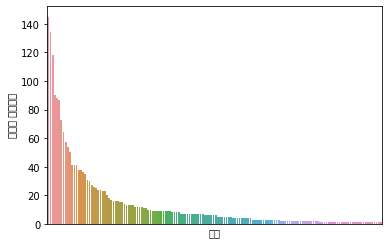

In [53]:
industry_num = pd.DataFrame(Fin_industry["업종명"].value_counts(ascending = False))
industry_num.rename(columns = {"업종명" : "업종별_기업개수"}, inplace = True)
industry_num["업종명"] = industry_num.index

plt.rc('font', family='NanumBarunGothic')
num_plot = sns.barplot(data = industry_num,
                       x = "업종명",
                       y = "업종별_기업개수")
num_plot.axes.xaxis.set_ticks([])
num_plot.set_xlabel("업종")
num_plot.set_ylabel("업종별 기업개수")

sns.set(rc={'figure.figsize':(10,8)})
plt.show()

In [54]:
# 업종별 기업개수가 1개이거나 2개인 업종 제거
industry_onetwo = industry_num[(industry_num["업종별_기업개수"] == 1) | (industry_num["업종별_기업개수"] == 2)].index

for onetwo in industry_onetwo :
  Fin_industry = Fin_industry.loc[Fin_industry["업종명"] != onetwo]

Fin_industry = Fin_industry[["회사명", "업종명","부채비율", "유동비율", "고정비율",
              "매출액영업이익률", "매출액세전순이익률",
              "매출액증가율", "영업이익증가율", "총자산회전율", "고정자산회전율",
              "PER", "PBR"]]

In [55]:
#한글 폰트

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 4 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconf

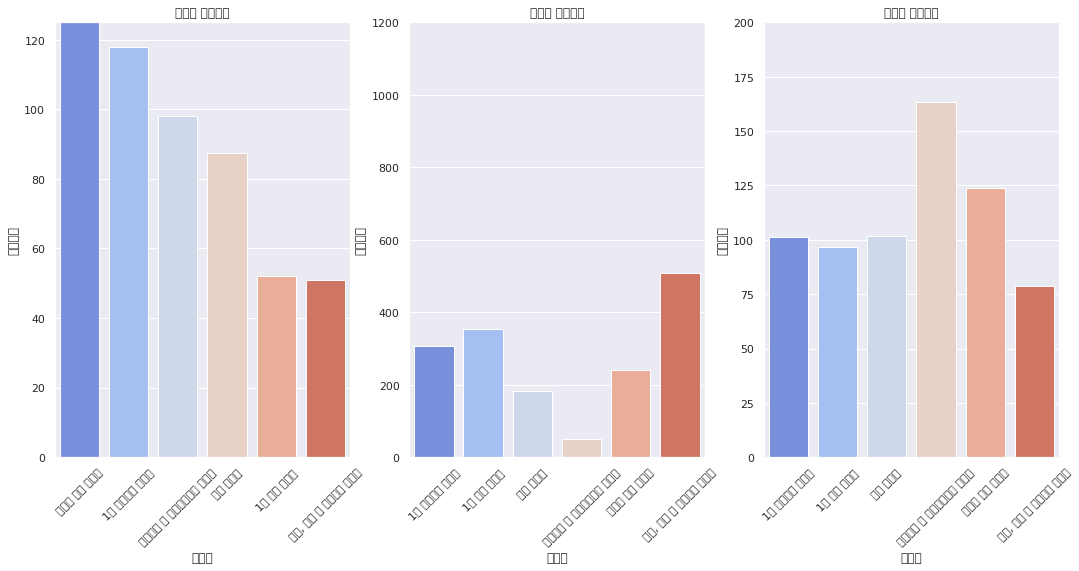

In [59]:
# 안정성 재무지표 시각화
stability_df = Fin_industry.groupby(['업종명'],as_index=False)[["부채비율", "유동비율", '고정비율']].mean().head(6)

figure, ((ax1,ax2,ax3)) = plt.subplots(nrows=1, ncols=3)
figure.set_size_inches(18,8)

plt.rc('font', family='Malgun Gothic')
liability = sns.barplot(data = stability_df.sort_values("부채비율", ascending = False),
            x = "업종명", 
            y = '부채비율',
            ax = ax1,
            palette='coolwarm')
liability.set_xticklabels(liability.get_xticklabels(),rotation = 45)
liability.set_xlabel("업종명")
liability.set_ylabel("부채비율")
liability.set_title('업종별 부채비율')
liability.set(ylim = (0, 125))

current = sns.barplot(data = stability_df,
            x = "업종명", 
            y = '유동비율',
            ax = ax2,
            palette='coolwarm')
current.set_xticklabels(current.get_xticklabels(),rotation = 45)
current.set_xlabel("업종명")
current.set_ylabel("유동비율")
current.set_title("업종별 유동비율")
current.set(ylim = (0, 1200))

fix = sns.barplot(data = stability_df,
            x = "업종명", 
            y = '고정비율',
            ax = ax3,
            palette='coolwarm')
fix.set_xticklabels(fix.get_xticklabels(),rotation = 45)
fix.set_xlabel("업종명")
fix.set_ylabel("고정비율")
fix.set_title('업종별 고정비율')
fix.set(ylim = (0, 200))
plt.show()

In [ ]:
import matplotlib
matplotlib.matplotlib_fname()

In [ ]:
matplotlib.get_cachedir()

In [ ]:
fontprop = fm.FontProperties(fname="C:/Users/pc/anaconda3/pkgs/matplotlib-base-3.5.1-py39hd77b12b_1/Lib/site-packages/matplotlib/mpl-data/fonts/ttf/NanumGothic.ttf",size=14)

In [ ]:
# 수익성 재무지표 시각화
profitability_df = Fin_industry.groupby(['업종명'],as_index=False)[["매출액영업이익률", "매출액세전순이익률"]].mean().head(6)


figure, ((ax1,ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,8)

plt.rc('font',family='NanumGothic')
profit = sns.barplot(data = profitability_df,
            x = "업종명", 
            y = '매출액영업이익률',
            ax = ax1,
            palette='coolwarm')
profit.set_xticklabels(profit.get_xticklabels(),rotation = 45)
profit.set_xlabel("업종명")
profit.set_ylabel("매출액영업이익률")
profit.set_title('업종별 매출액영업이익률')
profit.set(ylim = (0, 15))

before_tax_profit = sns.barplot(data = profitability_df,
            x = "업종명", 
            y = '매출액세전순이익률',
            ax = ax2,
            palette='coolwarm')
before_tax_profit.set_xticklabels(before_tax_profit.get_xticklabels(),rotation = 45)
before_tax_profit.set_xlabel("업종명")
before_tax_profit.set_ylabel("매출액세전순이익률")
before_tax_profit.set_title('업종별 매출액세전순이익률')
before_tax_profit.set(ylim = (0, 20))

In [ ]:
# 성장성 재무지표 시각화
growth_df = Fin_industry.groupby(['업종명'],as_index=False)[["매출액증가율", "영업이익증가율"]].mean().head(6)

figure, ((ax1,ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,8)

plt.rc('font', family='NanumBarunGothic')
take = sns.barplot(data = growth_df,
            x = "업종명", 
            y = '매출액증가율',
            ax = ax1,
            palette='coolwarm')
take.set_xticklabels(take.get_xticklabels(),rotation = 45)
take.set_xlabel("업종명")
take.set_ylabel("매출액증가율")
take.set_title('업종별 매출액증가율')
take.set(ylim = (0, 35))

operating = sns.barplot(data = growth_df,
            x = "업종명", 
            y = '영업이익증가율',
            ax = ax2,
            palette='coolwarm')
operating.set_xticklabels(operating.get_xticklabels(),rotation = 45)
operating.set_xlabel("업종명")
operating.set_ylabel("영업이익증가율")
operating.set_title('업종별 영업이익증가율')
operating.set(ylim = (-30, 1000))

In [ ]:
# 활동성 재무지표 시각화
activity_df = Fin_industry.groupby(['업종명'],as_index=False)[["총자산회전율", "고정자산회전율"]].mean().head(6)

figure, ((ax1,ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,8)

plt.rc('font', family='NanumBarunGothic')
total = sns.barplot(data = activity_df,
            x = "업종명", 
            y = '총자산회전율',
            ax = ax1,
            palette='coolwarm')
total.set_xticklabels(total.get_xticklabels(),rotation = 45)
total.set_xlabel("업종명")
total.set_ylabel("총자산회전율")
total.set_title('업종별 총자산회전율')
total.set(ylim = (0, 1.2))

fixed = sns.barplot(data = activity_df,
            x = "업종명", 
            y = '고정자산회전율',
            ax = ax2,
            palette='coolwarm')
fixed.set_xticklabels(fixed.get_xticklabels(),rotation = 45)
fixed.set_xlabel("업종명")
fixed.set_ylabel("고정자산회전율")
fixed.set_title('업종별 고정자산회전율')
fixed.set(ylim = (0, 3.5))

In [ ]:
# 시장가치비율 재무지표 시각화
market_value_df = Fin_industry.groupby(['업종명'],as_index=False)[["PER", "PBR"]].mean().head(6)

figure, ((ax1,ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,8)

plt.rc('font', family='NanumBarunGothic')
price_to_earnings_ratio = sns.barplot(data = market_value_df,
            x = "업종명", 
            y = 'PER',
            ax = ax1,
            palette='coolwarm')
price_to_earnings_ratio.set_xticklabels(price_to_earnings_ratio.get_xticklabels(),rotation = 45)
price_to_earnings_ratio.set_xlabel("업종명")
price_to_earnings_ratio.set_ylabel("PER")
price_to_earnings_ratio.set_title('업종별 PER')
price_to_earnings_ratio.set(ylim = (-40, 30))

price_book_value_ratio = sns.barplot(data = market_value_df,
            x = "업종명", 
            y = 'PBR',
            ax = ax2,
            palette='coolwarm')
price_book_value_ratio.set_xticklabels(price_book_value_ratio.get_xticklabels(),rotation = 45)
price_book_value_ratio.set_xlabel("업종명")
price_book_value_ratio.set_ylabel("PBR")
price_book_value_ratio.set_title('업종별 PBR')
price_book_value_ratio.set(ylim = (0, 2))

In [ ]:
indus_name = Fin_industry["업종명"]
Fin_list = []
for indus_name in Fin_industry["업종명"].unique() :
  temp = Fin_industry[Fin_industry["업종명"] == indus_name]
  average = Fin_industry[Fin_industry["업종명"] == indus_name].mean(axis = 0)
  std = Fin_industry[Fin_industry["업종명"] == indus_name].std(axis = 0)
  standardization = (temp[temp["업종명"] == indus_name].drop(columns = ["회사명", "업종명"]) - average)/std

  stability = standardization["부채비율"]*(-1/3) + standardization["유동비율"]*(1/3) + standardization["고정비율"]*(-1/3)
  profitability = standardization["매출액영업이익률"]*0.5 + standardization["매출액세전순이익률"]*0.5
  growth = standardization["매출액증가율"]*0.5 + standardization["영업이익증가율"]*0.5
  activity = standardization["총자산회전율"]*0.5 + standardization["고정자산회전율"]*0.5
  market_value_ratio = standardization["PER"]*0.5 + standardization["PBR"]*0.5

  Fin_list.append(pd.concat([temp[["회사명", "업종명"]] ,standardization, stability, profitability, growth, activity, market_value_ratio],
            axis= 1).rename(columns = {0 : "안정성",
                                       1 : "수익성",
                                       2 : "성장성",
                                       3 : "활동성",
                                       4 : "시장가치비율"}))

financial_index = pd.DataFrame()
for i in range(len(Fin_list)) :
  financial_index = pd.concat([financial_index, Fin_list[i]])
financial_index.reset_index(drop = True, inplace = True)
financial_index

In [ ]:
len(stability_top100_cat['업종명'])

In [ ]:
len(stability_top100_cat['counts'])

In [ ]:
# 안정성 상위 10개 회사
stability_top10 = financial_index.sort_values(by=['안정성'], ascending=False).head(10)

In [ ]:
# 안정성 상위 10개 회사
stability_top10 = financial_index.sort_values(by=['안정성'], ascending=False).head(10)

List = ['의약품 제조업', '전자부품 제조업','자동차 신품 부품 제조업','의료용 기기 제조업','통신 및 방송 장비 제조업','기타 금융업','기타 화학제품 제조업','기타 식품 제조업','전동기, 발전기 및 전기 변환ㆍ 공급ㆍ제어 장치 제조업']
# 안정성 상위 100개 회사
stability_top100 = financial_index[['회사명','안정성','업종명']].groupby(['업종명','회사명']).mean().sort_values(by=['안정성'], ascending=False).head(100)
stability_top100['업종명'] = stability_top100.index.get_level_values('업종명')
stability_top100_cat = stability_top100['업종명'].value_counts().rename_axis('업종명').reset_index(name='counts')
stability_top100_cat = stability_top100_cat[stability_top100_cat['counts'] > 2]

plt.figure(figsize=(25,10))
plt.rc('font', family='NanumBarunGothic')

plt.subplot(1,2,1)

g = sns.barplot(
    data= stability_top10,
    x= "회사명",
    y= "안정성",
    palette='coolwarm'
)
g.set_xlabel("회사명", fontsize = 20)
g.set_ylabel("안정성", fontsize = 20)
plt.title('안정성 높은 회사 top 10' ,size=25)

plt.subplot(1,2,2)

explode = [0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
colors = ['lightblue','orange', 'pink', 'purple', 'green', 'yellow', 'lightgreen','brown','red']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 2}

plt.pie(stability_top100_cat['counts'], labels=stability_top100_cat['업종명'] , 
        startangle=90, counterclock=False, autopct='%1.1f%%', 
        colors=colors, wedgeprops=wedgeprops, explode=explode)

plt.title('안정성 상위 100개 회사가 속한 업종들', fontsize=20)

In [ ]:
len(profitability_top100_cat['업종명'])

In [ ]:
# 수익성 상위 10개 회사
profitability_top10 = financial_index.sort_values(by=['수익성'], ascending=False).head(10)

# 수익성 상위 100개 회사
profitability_top100 = financial_index[['회사명','수익성','업종명']].groupby(['업종명','회사명']).mean().sort_values(by=['수익성'], ascending=False).head(100)
profitability_top100['업종명'] = profitability_top100.index.get_level_values('업종명')
profitability_top100_cat = profitability_top100['업종명'].value_counts().rename_axis('업종명').reset_index(name='counts')
profitability_top100_cat = profitability_top100_cat[profitability_top100_cat['counts'] > 2]

plt.figure(figsize=(25,10))
plt.rc('font', family='NanumBarunGothic')

plt.subplot(1,2,1)

g = sns.barplot(
    data= profitability_top10,
    x= "회사명",
    y= "수익성",
    palette='coolwarm'
)
g.set_xlabel("회사명", fontsize = 20)
g.set_ylabel("수익성", fontsize = 20)
plt.title('수익성 높은 회사 top 10' ,size=25)

plt.subplot(1,2,2)
explode = [0.1, 0.0, 0.0, 0.0, 0.0, 0.0,0.0]
colors = ['lightblue','orange', 'pink', 'purple', 'green', 'yellow', 'lightgreen']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 2}

plt.pie(profitability_top100_cat['counts'], labels = profitability_top100_cat['업종명'], 
        startangle=90, counterclock=False, autopct='%1.1f%%', 
        colors=colors, wedgeprops=wedgeprops, explode=explode)
plt.title('수익성 상위 100개 회사가 속한 업종들', fontsize=20)

In [ ]:
len(growth_top100_cat['업종명'])

In [ ]:
# 성장성 상위 10개 회사
growth_top10 = financial_index.sort_values(by=['성장성'], ascending=False).head(10)

# 성장성 상위 100개 회사
growth_top100 = financial_index[['회사명','성장성','업종명']].groupby(['업종명','회사명']).mean().sort_values(by=['성장성'], ascending=False).head(100)
growth_top100['업종명'] = growth_top100.index.get_level_values('업종명')
growth_top100_cat = growth_top100['업종명'].value_counts().rename_axis('업종명').reset_index(name='counts')
growth_top100_cat = growth_top100_cat[growth_top100_cat['counts'] > 2]

plt.figure(figsize=(25,10))
plt.rc('font', family='NanumBarunGothic')

plt.subplot(1,2,1)

g = sns.barplot(
    data= growth_top10,
    x= "회사명",
    y= "성장성",
    palette='coolwarm'
)
g.set_xlabel("회사명", fontsize = 20)
g.set_ylabel("성장성", fontsize = 20)
plt.title('성장성 높은 회사 top 10' ,size=25)

plt.subplot(1,2,2)
explode = [0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
colors = ['lightblue','orange', 'pink', 'purple', 'green', 'yellow', 'lightgreen']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 2}

plt.pie(growth_top100_cat['counts'], labels=growth_top100_cat['업종명'], 
        startangle=90, counterclock=False, autopct='%1.1f%%', 
        colors=colors, wedgeprops=wedgeprops, explode=explode)
plt.title('성장성 상위 100개 회사가 속한 업종들', fontsize=20)

In [ ]:
len(activity_top100_cat['업종명'])

In [ ]:
# 활동성 상위 10개 회사
activity_top10 = financial_index.sort_values(by=['활동성'], ascending=False).head(10)

# 활동성 상위 100개 회사
activity_top100 = financial_index[['회사명','활동성','업종명']].groupby(['업종명','회사명']).mean().sort_values(by=['활동성'], ascending=False).head(100)
activity_top100['업종명'] = activity_top100.index.get_level_values('업종명')
activity_top100_cat = activity_top100['업종명'].value_counts().rename_axis('업종명').reset_index(name='counts')
activity_top100_cat = activity_top100_cat[activity_top100_cat['counts'] > 2]

plt.figure(figsize=(25,10))
plt.rc('font', family='NanumBarunGothic')

plt.subplot(1,2,1)

g = sns.barplot(
    data= activity_top10,
    x= "회사명",
    y= "활동성",
    palette='coolwarm'
)
g.set_xlabel("회사명", fontsize = 20)
g.set_ylabel("활동성", fontsize = 20)
plt.title('활동성 높은 회사 top 10' ,size=25)

plt.subplot(1,2,2)
explode = [0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
colors = ['lightblue','orange', 'pink', 'purple', 'green', 'yellow', 'lightgreen']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 2}

plt.pie(activity_top100_cat['counts'], labels=activity_top100_cat['업종명'], 
        startangle=90, counterclock=False, autopct='%1.1f%%', 
        colors=colors, wedgeprops=wedgeprops, explode=explode)
plt.title('활동성 상위 100개 회사가 속한 업종들', fontsize=20)

In [ ]:
# 시장가치비율 상위 10개 회사
market_value_ratio_top10 = financial_index.sort_values(by=['시장가치비율'], ascending=False).head(10)

# 시장가치비율 상위 100개 회사
market_value_ratio_top100 = financial_index[['회사명','시장가치비율','업종명']].groupby(['업종명','회사명']).mean().sort_values(by=['시장가치비율'], ascending=False).head(100)
market_value_ratio_top100['업종명'] = market_value_ratio_top100.index.get_level_values('업종명')
market_value_ratio_top100_cat = market_value_ratio_top100['업종명'].value_counts().rename_axis('업종명').reset_index(name='counts')
market_value_ratio_top100_cat = market_value_ratio_top100_cat[market_value_ratio_top100_cat['counts'] > 2]

plt.figure(figsize=(25,10))
plt.rc('font', family='NanumBarunGothic')

plt.subplot(1,2,1)

g = sns.barplot(
    data= market_value_ratio_top10,
    x= "회사명",
    y= "시장가치비율",
    palette='coolwarm'
)
g.set_xlabel("회사명", fontsize = 20)
g.set_ylabel("시장가치비율", fontsize = 20)
plt.title('시장가치비율 높은 회사 top 10' ,size=25)

plt.subplot(1,2,2)
explode = [0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
colors = ['lightblue','orange', 'pink', 'purple', 'green', 'yellow', 'lightgreen']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 2}

plt.pie(market_value_ratio_top100_cat['counts'], labels=market_value_ratio_top100_cat['업종명'], 
        startangle=90, counterclock=False, autopct='%1.1f%%', 
        colors=colors, wedgeprops=wedgeprops, explode=explode)
plt.title('시장가치비율 상위 100개 회사가 속한 업종들', fontsize=20)

In [ ]:
len(market_value_ratio_top100_cat['업종명'])

In [ ]:
# AHP분석을 시행해주는 함수 생성
def preference_calculation():

  def pairwise_comparison(A, B) :
    while True :
      importance = str(input("기업의 특징 중 " + str(A) + "과 " +str(B) + " 중 무엇이 더 중요한지를 입력해주세요."))
      if importance == "안정성" or importance == "불황에도 부도를 내지 않을 능력" or importance == "불황에도 부도를 내지 않을 능력(안정성)":
        importance = "\'불황에도 부도를 내지 않을 능력(안정성)\'"
      elif importance == "수익성" or importance == "수익 창출로 많은 이익을 남기는 능력" or importance == "수익 창출로 많은 이익을 남기는 능력(수익성)" :
        importance = "\'수익 창출로 많은 이익을 남기는 능력(수익성)\'"
      elif importance == "성장성" or importance == "매출과 이익의 성장가능성이 높은 능력" or importance == "매출과 이익의 성장가능성이 높은 능력(성장성)" :
        importance = "\'매출과 이익의 성장가능성이 높은 능력(성장성)\'"
      elif importance == "활동성" or importance == "기업이 자산을 효율적으로 이용하는 능력" or importance == "기업이 자산을 효율적으로 이용하는 능력(활동성)" :
        importance = "\'기업이 자산을 효율적으로 이용하는 능력(활동성)\'"
      elif importance == "시장가치비율" or importance == "주식 시장에서 높은 평가를 받는 능력" or importance == "주식 시장에서 높은 평가를 받는 능력(시장가치비율)" :
        importance = "\'주식 시장에서 높은 평가를 받는 능력(시장가치비율)\'"

      if importance == A : 
        temp = int(input("기업의 특징 중 " + str(A) + "이 " + str(B) + "에 비해 얼마나 중요한지를 1부터 9까지의 숫자로 표현해주세요. \n1은 " + str(A) + "과 " + str(B) + "의 중요도가 같음을 의미하고, 9는 " + str(A) + "이 " + str(B) + " 보다 절대적으로 중요함을 의미합니다.\n"))
        break
      elif importance == B :
        temp = 1/int(input("기업의 특징 중 " + str(B) + "이 " + str(A) + "에 비해 얼마나 중요한지를 1부터 9까지의 숫자로 표현해주세요. \n1은 " + str(B) + "과 " + str(A) + "의 중요도가 같음을 의미하고, 9는 " + str(B) + "이 " + str(A) + " 보다 절대적으로 중요함을 의미합니다.\n"))
        break
      elif (importance != A) or (importance != B) :
        print("잘못 입력하셨습니다. 다시 답변해주세요.")
    return temp


  CR = 1
  while CR >= 0.2 :

    # 쌍대비교 입력
    stabVSprofit = pairwise_comparison("\'불황에도 부도를 내지 않을 능력(안정성)\'", "\'수익 창출로 많은 이익을 남기는 능력(수익성)\'")
    stabVSgrowth = pairwise_comparison("\'불황에도 부도를 내지 않을 능력(안정성)\'", "\'매출과 이익의 성장가능성이 높은 능력(성장성)\'")
    stabVSactivity = pairwise_comparison("\'불황에도 부도를 내지 않을 능력(안정성)\'", "\'기업이 자산을 효율적으로 이용하는 능력(활동성)\'")
    stabVSmarketvalue = pairwise_comparison("\'불황에도 부도를 내지 않을 능력(안정성)\'", "\'주식 시장에서 높은 평가를 받는 능력(시장가치비율)\'")
    profitVSgrowth = pairwise_comparison("\'수익 창출로 많은 이익을 남기는 능력(수익성)\'", "\'매출과 이익의 성장가능성이 높은 능력(성장성)\'")
    profitVSactivity = pairwise_comparison("\'수익 창출로 많은 이익을 남기는 능력(수익성)\'", "\'기업이 자산을 효율적으로 이용하는 능력(활동성)\'")
    profitVSmarketvalue = pairwise_comparison("\'수익 창출로 많은 이익을 남기는 능력(수익성)\'", "\'주식 시장에서 높은 평가를 받는 능력(시장가치비율)\'")
    growthVSactivity = pairwise_comparison("\'매출과 이익의 성장가능성이 높은 능력(성장성)\'", "\'기업이 자산을 효율적으로 이용하는 능력(활동성)\'")
    growthVSmarketvalue = pairwise_comparison("\'매출과 이익의 성장가능성이 높은 능력(성장성)\'", "\'주식 시장에서 높은 평가를 받는 능력(시장가치비율)\'")
    activityVSmarketvalue = pairwise_comparison("\'기업이 자산을 효율적으로 이용하는 능력(활동성)\'", "\'주식 시장에서 높은 평가를 받는 능력(시장가치비율)\'")

    # 쌍대비교행렬
    pairwise_comparison = np.array([
                   [1, stabVSprofit, stabVSgrowth, stabVSactivity, stabVSmarketvalue], 
                   [1/stabVSprofit, 1, profitVSgrowth, profitVSactivity, profitVSmarketvalue], 
                   [1/stabVSgrowth, 1/profitVSgrowth, 1, growthVSactivity, growthVSmarketvalue],
                   [1/stabVSactivity, 1/profitVSactivity, 1/growthVSactivity, 1, activityVSmarketvalue], 
                   [1/stabVSmarketvalue, 1/profitVSmarketvalue, 1/growthVSmarketvalue, 1/activityVSmarketvalue, 1]
                   ])
    # 쌍대비교행렬 열별 요소들의 합
    col_sums = pairwise_comparison.sum(axis=0)

    # 쌍대비교행렬 열별로 표준화
    standard_comparison = pairwise_comparison / col_sums

    # 항목별 선호도(가중치) 산출
    preference = standard_comparison.mean(axis=1)

    # 일관성비율 CR = CI/RI
    CI = (np.mean(pairwise_comparison @ preference/preference) - 5)/4
    RI = 1.12 # matrix size가 5일때 RI = 1.12로 알려져있다.
    CR = CI / RI

    if CR >= 0.2 :
      print("------------------------------------------------------------------------------------ ")
      print("\n 답변이 일관적이지 않아 정확한 선호도 산출이 불가능합니다. 다시 답변 부탁드립니다. \n")
      print("------------------------------------------------------------------------------------")
      continue
    else :
      print("기업 특징에 대한 이용자님의 선호도는 다음과 같습니다. \n")
      print("불황에도 부도를 내지 않을 능력(안정성) : ", round(preference[0], 2), "\n"
            "수익 창출로 많은 이익을 남기는 능력(수익성) : ", round(preference[1], 2), "\n"
            "매출과 이익의 성장가능성이 높은 능력(성장성) : ", round(preference[2], 2), "\n"
            "기업이 자산을 효율적으로 이용하는 능력(활동성) : ", round(preference[3], 2), "\n"
            "주식 시장에서 높은 평가를 받는 능력(시장가치비율) : ", round(preference[4], 2))
  
  return pd.DataFrame(preference, index = ["안정성", "수익성", "성장성", "활동성", "시장가치비율"], columns = ["선호도"])

In [ ]:
# 가상의 구직자를 설정하여 맞춤형 기업 선호도 산출
preference = preference_calculation()

In [ ]:
# 이용자의 선호도
preference_plot = preference.copy()
property_index = round(preference_plot["선호도"], 2)
preference_plot["선호도"] = property_index
preference_plot["재무특성"] = preference_plot.index
preference_plot = pd.DataFrame(preference_plot.sort_values("선호도",ascending = False))

explode = [0.1, 0.0, 0.0, 0.0, 0.0]
colors = ['lightblue','orange', 'pink', 'purple', 'green', 'yellow', 'lightgreen']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 2}

plt.pie(preference_plot['선호도'], labels=preference_plot['재무특성'], 
        startangle=90, counterclock=False, autopct='%1.1f%%', 
        colors=colors, wedgeprops=wedgeprops, explode=explode)
plt.title('김구직님의 재무특성 선호도', fontsize=25)